In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import re
import math
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [2]:
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 
class_names = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}
  

In [3]:
df = X.copy()
df['target'] = y

continuous_cols = df.columns[:10]

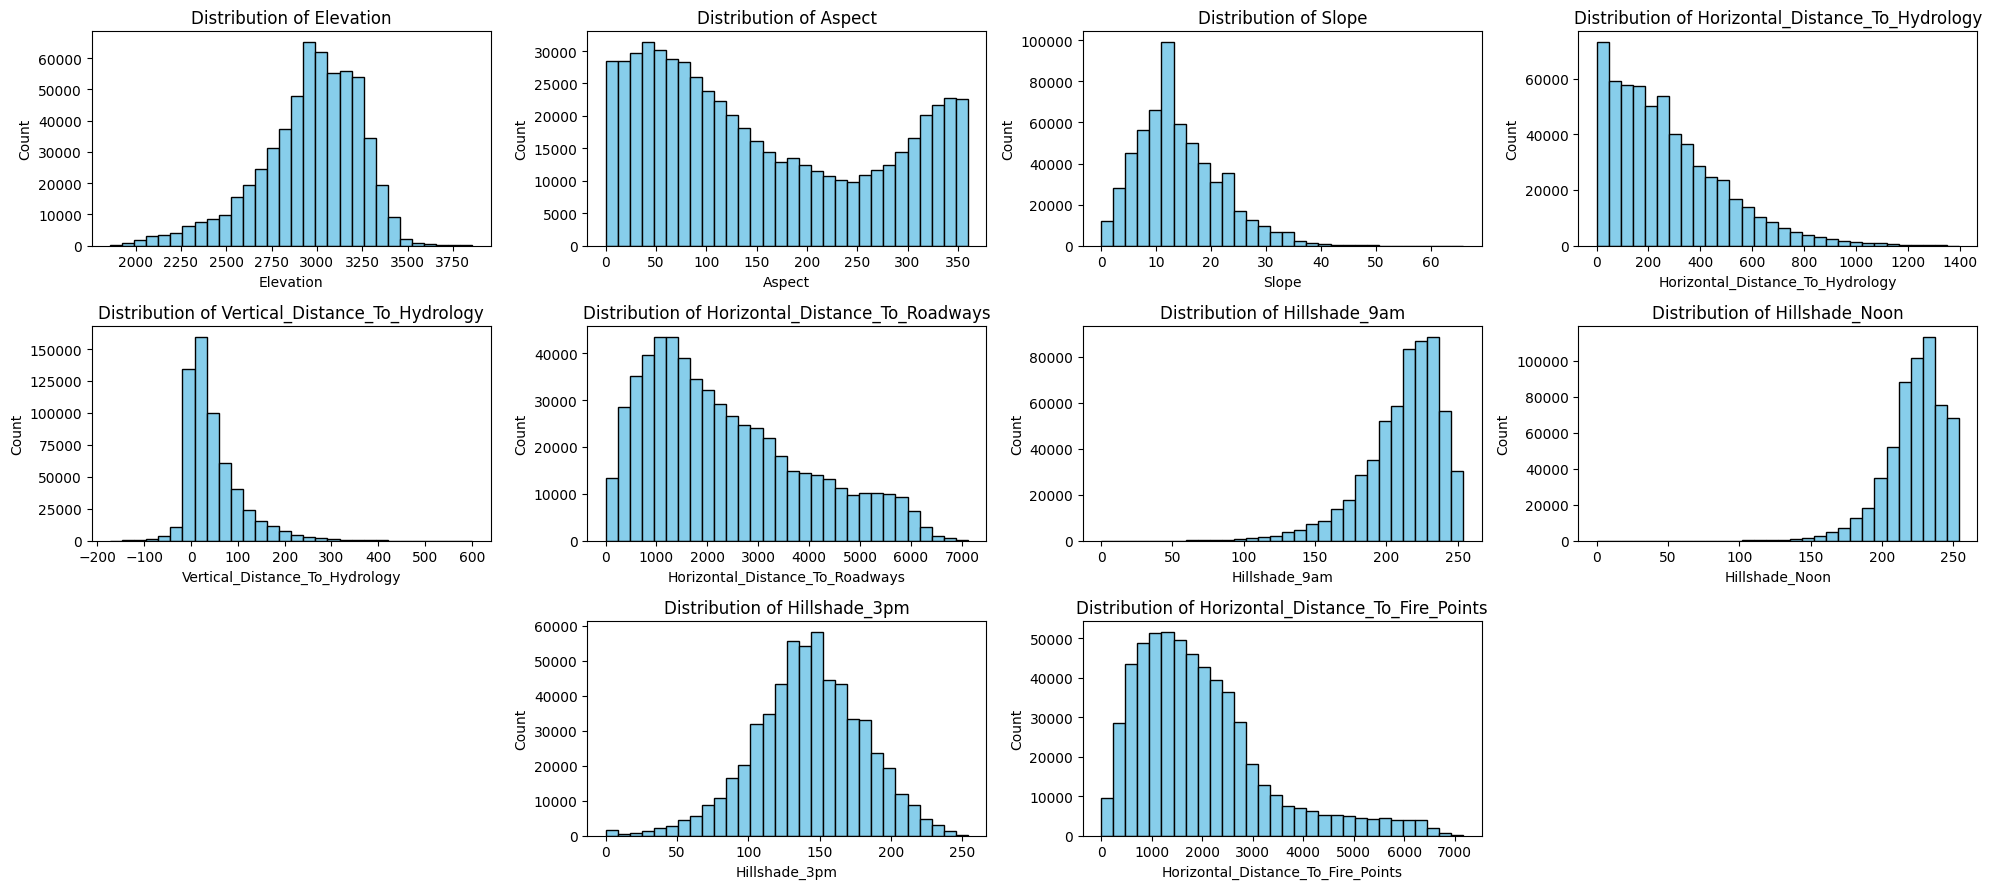

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

n = len(continuous_cols)
cols = 4
rows = math.ceil(n / cols)

fig = plt.figure(figsize=(20, rows * 3))
gs = gridspec.GridSpec(rows, cols, figure=fig)

for i, col in enumerate(continuous_cols):
    row = i // cols
    col_idx = i % cols
    if row == rows - 1 and n % cols != 0:
        offset = (cols - (n % cols)) // 2
        col_idx += offset
    ax = fig.add_subplot(gs[row, col_idx])
    ax.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [5]:
print(df.columns[10], df.columns[51], df.columns[52], df.columns[53])
print(len(df.columns))

Wilderness_Area1 Wilderness_Area2 Wilderness_Area3 Wilderness_Area4
55


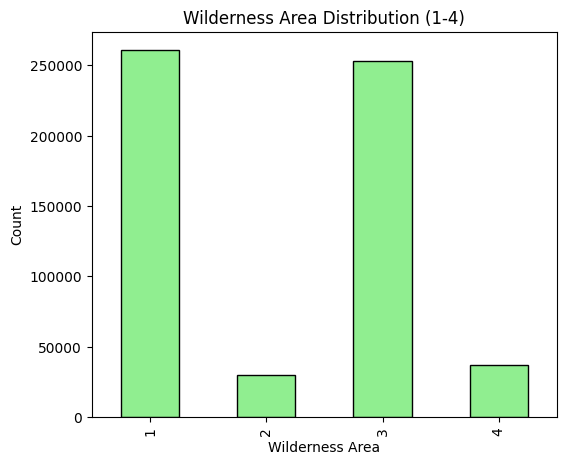

In [6]:
wilderness_cols = [df.columns[10], df.columns[51], df.columns[52], df.columns[53]]
df['wilderness'] = df[wilderness_cols].idxmax(axis=1)
df['wilderness'] = df['wilderness'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

plt.figure(figsize=(6,5))
df['wilderness'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Wilderness Area Distribution (1-4)')
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.show()

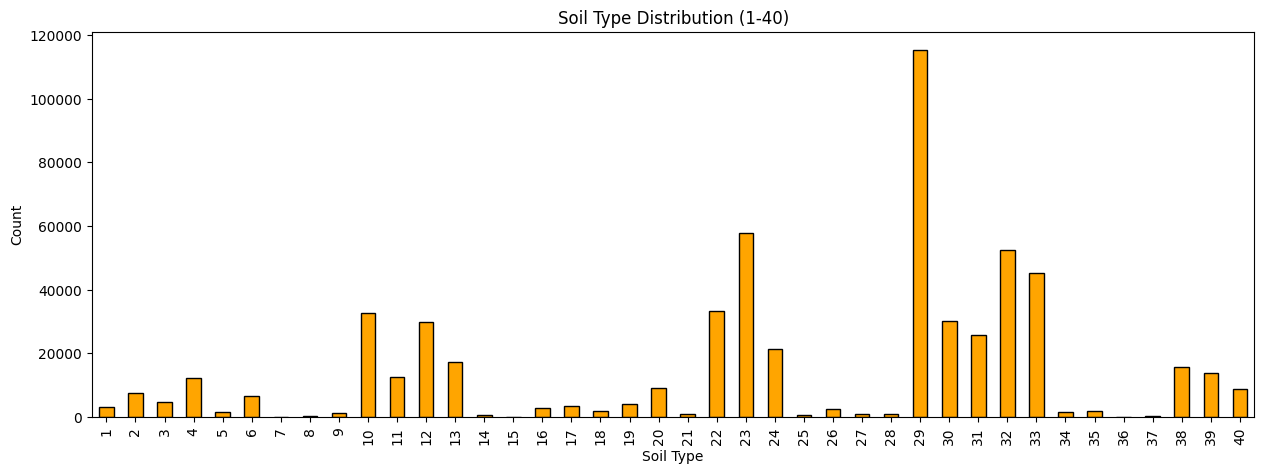

In [7]:
import re
soil_cols = [col for col in df.columns if col.startswith('Soil_Type')]
soil_cols = [col for col in soil_cols if col not in wilderness_cols]

df['soil_type'] = df[soil_cols].idxmax(axis=1)

df['soil_type'] = df['soil_type'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

plt.figure(figsize=(15,5))
df['soil_type'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Soil Type Distribution (1-40)')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()

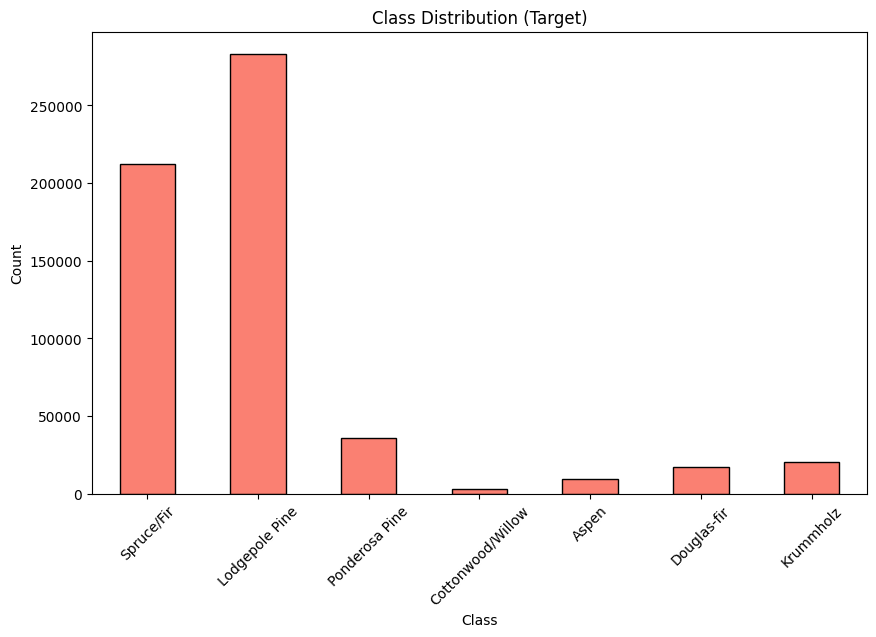

In [8]:
target_counts = df['target'].map(class_names).value_counts().reindex(class_names.values())

plt.figure(figsize=(10,6))
target_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Class Distribution (Target)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original training set class distribution:")
print(y_train.value_counts())

print("\nAfter SMOTE class distribution:")
print(y_train_res.value_counts())


Original training set class distribution:
target
2    226640
1    169472
3     28603
7     16408
6     13894
5      7594
4      2198
Name: count, dtype: int64

After SMOTE class distribution:
target
2    226640
7    226640
1    226640
5    226640
3    226640
4    226640
6    226640
Name: count, dtype: int64


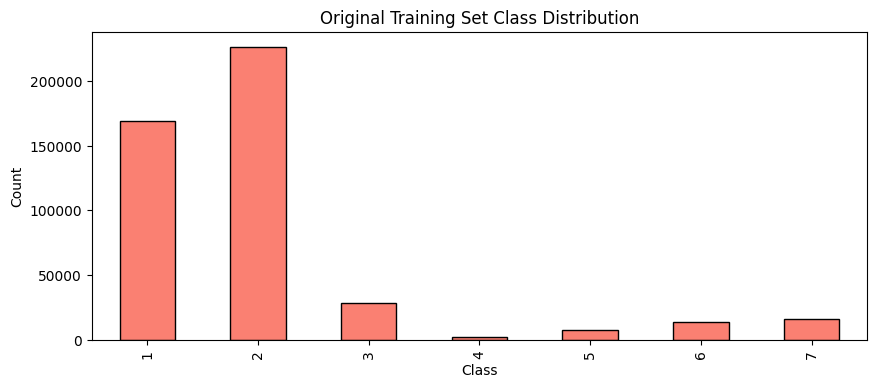

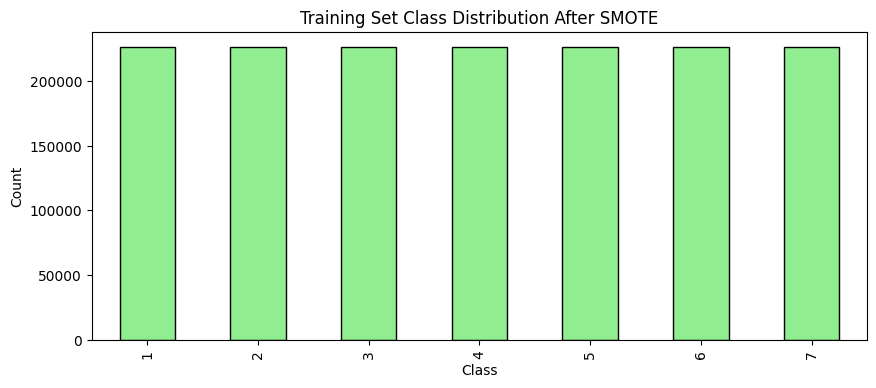

In [10]:


# Plot original training distribution
plt.figure(figsize=(10,4))
y_train.value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Original Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Plot after SMOTE
plt.figure(figsize=(10,4))
y_train_res.value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Training Set Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
min_class = dict(zip(unique, counts))

target_dict = {cls: min(5000, cnt) for cls, cnt in min_class.items()}


5000
dict_keys([np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)])


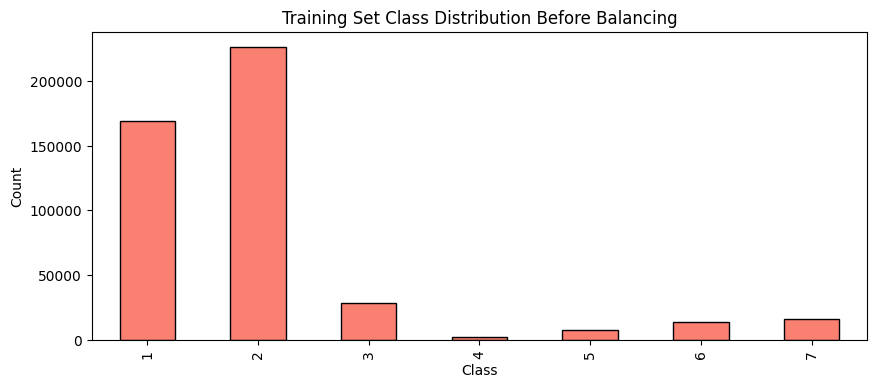

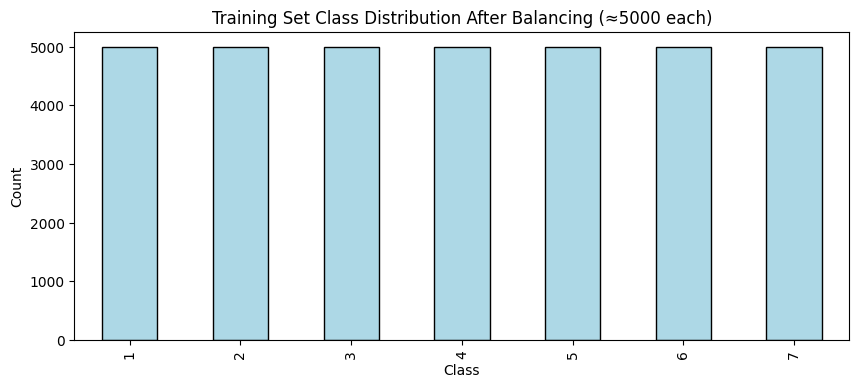

Before: {np.int64(1): np.int64(169472), np.int64(2): np.int64(226640), np.int64(3): np.int64(28603), np.int64(4): np.int64(2198), np.int64(5): np.int64(7594), np.int64(6): np.int64(13894), np.int64(7): np.int64(16408)}
After: {np.int64(1): np.int64(5000), np.int64(2): np.int64(5000), np.int64(3): np.int64(5000), np.int64(4): np.int64(5000), np.int64(5): np.int64(5000), np.int64(6): np.int64(5000), np.int64(7): np.int64(5000)}


In [17]:
plt.figure(figsize=(10,4))
y_train.value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Training Set Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
min_class = dict(zip(unique, counts))

target_dict = {cls: min(5000, cnt) for cls, cnt in min_class.items()}

under = RandomUnderSampler(sampling_strategy=target_dict, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)

pipeline = Pipeline([
    ('under', under),
    ('smote', smote)
])
X_res, y_res = pipeline.fit_resample(X_train, y_train)



plt.figure(figsize=(10,4))
y_res.value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title(f"Training Set Class Distribution After Balancing (≈{target_dict[np.int64(1)]} each)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Before:", dict(zip(unique, counts)))
print("After:", dict(zip(*np.unique(y_res, return_counts=True))))

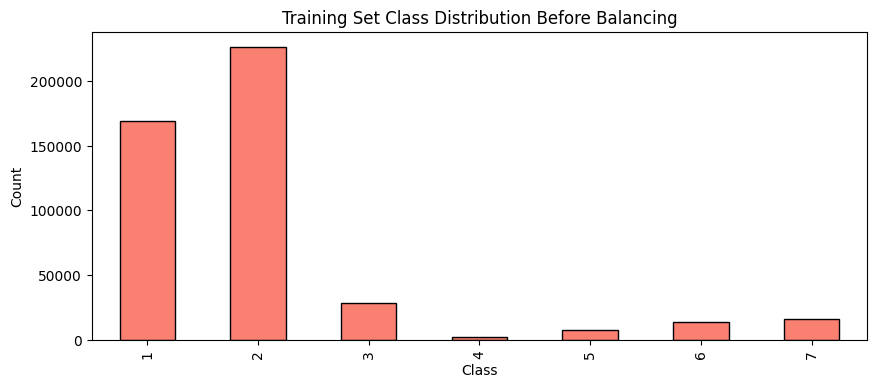

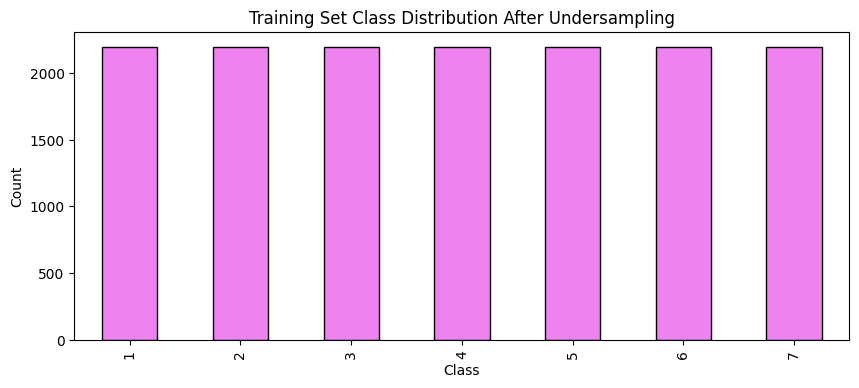

Before: {np.int64(1): np.int64(169472), np.int64(2): np.int64(226640), np.int64(3): np.int64(28603), np.int64(4): np.int64(2198), np.int64(5): np.int64(7594), np.int64(6): np.int64(13894), np.int64(7): np.int64(16408)}
After: {np.int64(1): np.int64(2198), np.int64(2): np.int64(2198), np.int64(3): np.int64(2198), np.int64(4): np.int64(2198), np.int64(5): np.int64(2198), np.int64(6): np.int64(2198), np.int64(7): np.int64(2198)}


In [18]:
plt.figure(figsize=(10,4))
y_train.value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Training Set Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
min_class = dict(zip(unique, counts))

target_dict = {cls: min(5000, cnt) for cls, cnt in min_class.items()}

X_res, y_res = utils.naive_undersample_data(X_train, y_train)



plt.figure(figsize=(10,4))
y_res.value_counts().sort_index().plot(kind='bar', color='violet', edgecolor='black')
plt.title(f"Training Set Class Distribution After Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Before:", dict(zip(unique, counts)))
print("After:", dict(zip(*np.unique(y_res, return_counts=True))))